# Задача 5. Обучение без учителя

- [X] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [X] Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.
- [ ] Самостоятельно реализуйте один из алгоритмов кластеризации, например K-means.
- [ ] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из sklearn (KMeans, Affinity Propogation, DBSCAN и тд).
- [ ] При обучении использовать подбор гиперпараметров.
- [ ] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [X] (+3 балла) Также снизить размерность данных с помощью метода главных компонент PCA и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [X] (+2 балла) Визуализировать данные снижением размерности до 2 или 3 с помощью PCA и t-SNE. В случае проблем с производительностью t-SNE, можно сначала до какой то степени снизить размерность с помощью PCA, а затем запустить t-SNE.

# Датасет
Будет использован [mnist_784](https://www.kaggle.com/datasets/aadeshkoirala/mnist-784), который содержит изображения рукописных чисел 28x28 пикселей


In [ ]:
import kagglehub
import shutil

path = kagglehub.dataset_download("aadeshkoirala/mnist-784")

print(path)

shutil.copyfile(f"{path}/mnist_784.csv", '/content/mnist_784.csv')

/kaggle/input/mnist-784


'/content/mnist_784.csv'

# EDA

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# print(X.shape)
df = pd.read_csv('/content/mnist_784.csv')

cols = list(df.columns)
cols.insert(0, cols.pop())
df = df.reindex(columns=cols)
df.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(70000, 785)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 419.2 MB


,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
df.dtypes

,0
class,int64
pixel1,int64
pixel2,int64
pixel3,int64
pixel4,int64
...,...
pixel780,int64
pixel781,int64
pixel782,int64
pixel783,int64


In [ ]:
df.isnull().sum()

,0
class,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


# PCA

<ipython-input-8-3631698592>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('jet', 10), alpha=0.6)


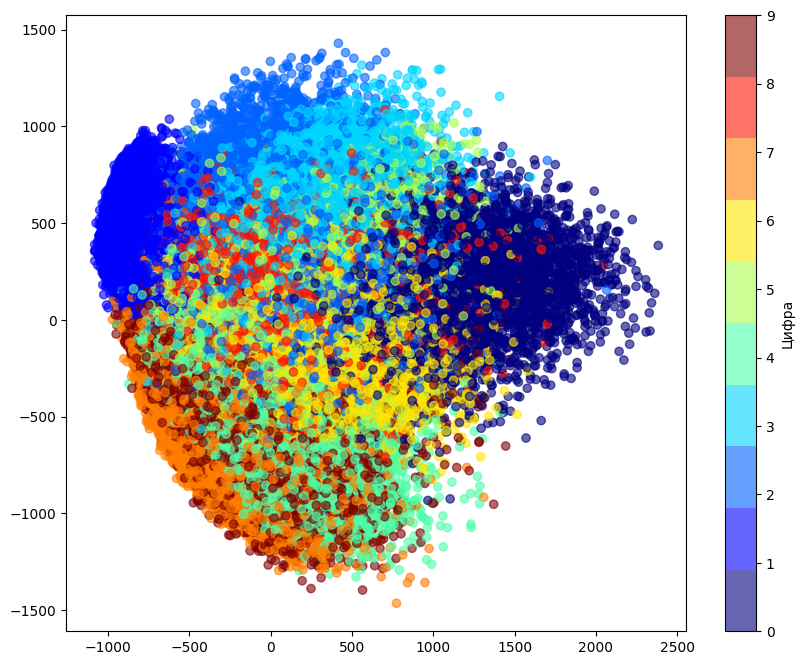

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_res = pca.fit_transform(df)

plt.figure(figsize=(10, 8))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=df['class'],
            cmap=plt.cm.get_cmap('jet', 10), alpha=0.6)
plt.colorbar(ticks=range(10), label='Цифра')

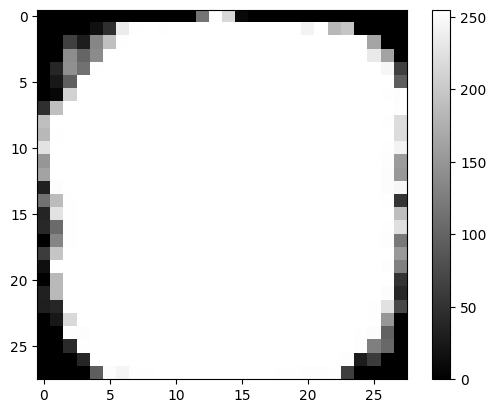

In [ ]:
plt.imshow(df.drop(columns=['class']).max().values.reshape([28, 28]), cmap="gray")
plt.colorbar()
plt.show()

Есть неиспользуемые пиксили, посчитаем дисперсию

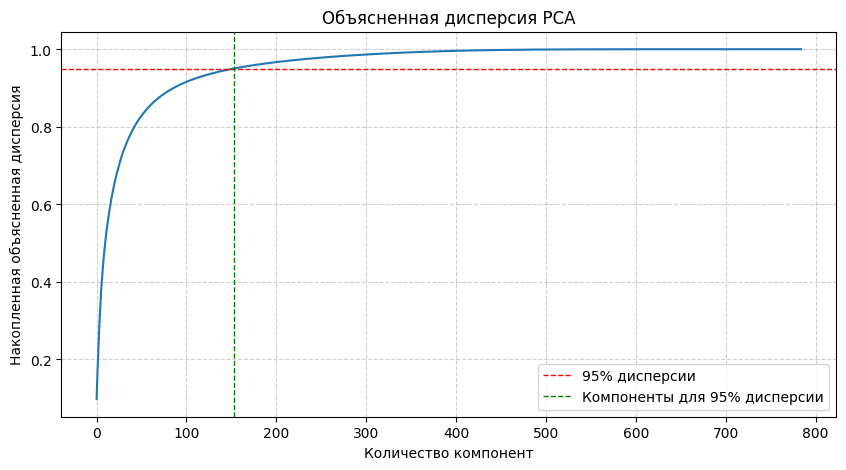

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('Объясненная дисперсия PCA')
plt.grid(True)

plt.axhline(y=0.95, color='red', linestyle='--', linewidth=1, label='95% дисперсии')
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95),
            color='green', linestyle='--', linewidth=1, label='Компоненты для 95% дисперсии')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(loc='lower right', fontsize=10)

plt.show()

При размерности 160 можно описать 95% дисперсии

# t-SNE

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


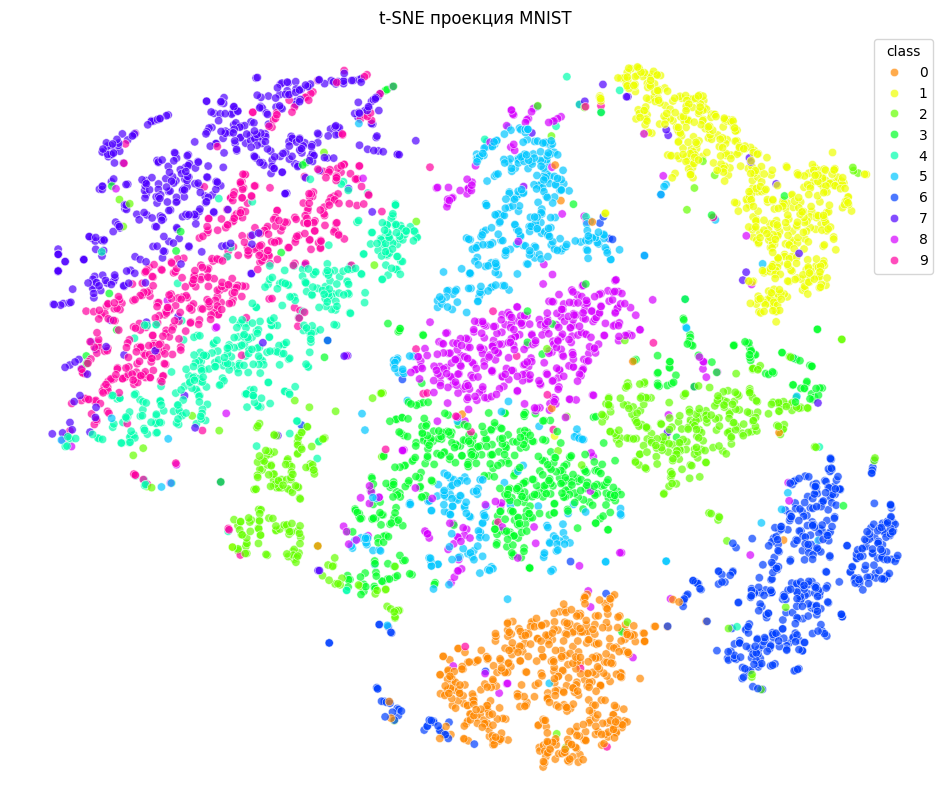

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['class']))
y = df['class']

pca = PCA(n_components=160)
X_pca = pca.fit_transform(X_scaled)

np.random.seed(42)
sample_idx = np.random.choice(X_pca.shape[0], 5000, replace=False)
X_sample = X_pca[sample_idx]
y_sample = y[sample_idx]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    learning_rate='auto',
    random_state=42,
    init='random',
    n_jobs=-1
)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=y_sample,
    palette=sns.color_palette("hsv", 10),
    legend='full',
    alpha=0.7
)
plt.title('t-SNE проекция MNIST')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted
import numpy as np

class MyKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, *, tol=1e-4, max_iter=300, init='k-means++', random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        self.init = init
        self.random_state = random_state

    def fit(self, X, y=None):
        self.n_clusters_ = check_scalar(
            self.n_clusters, "n_clusters", int, min_val=1
        )
        self.tol_ = check_scalar(
            self.tol, "tol", float, min_val=0.0
        )
        self.max_iter_ = check_scalar(
            self.max_iter, "max_iter", int, min_val=1
        )
        self.random_state_ = check_random_state(self.random_state)

        X = check_array(X, accept_sparse=False, dtype=np.float64)
        self.n_features_in_ = X.shape[1]

        self.cluster_centers_ = self._kmeans_plus_plus_init(X)

        for _ in range(self.max_iter_):
            labels = self._get_labels(X)

            new_centers = np.zeros_like(self.cluster_centers_)
            for i in range(self.n_clusters_):
                cluster_points = X[labels == i]
                if len(cluster_points) > 0:
                    new_centers[i] = cluster_points.mean(axis=0)
                else:
                    new_centers[i] = X[self.random_state_.choice(len(X))]

            center_shift = np.linalg.norm(self.cluster_centers_ - new_centers, axis=1).max()
            if center_shift < self.tol_:
                break

            self.cluster_centers_ = new_centers

        self.labels_ = self._get_labels(X)
        self.inertia_ = self._calculate_inertia(X)
        self.n_iter_ = _ + 1

        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self._get_labels(X)

    def fit_predict(self, X, y=None):
        return self.fit(X).labels_

    def _kmeans_plus_plus_init(self, X):
        centers = np.empty((self.n_clusters_, self.n_features_in_))

        first_idx = self.random_state_.randint(len(X))
        centers[0] = X[first_idx]

        for i in range(1, self.n_clusters_):
            dists = np.min(np.linalg.norm(X[:, np.newaxis] - centers[:i], axis=2), axis=1)
            probs = dists**2 / np.sum(dists**2)
            next_idx = self.random_state_.choice(len(X), p=probs)
            centers[i] = X[next_idx]

        return centers

    def _get_labels(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

    def _calculate_inertia(self, X):
        return np.sum([
            np.sum(np.linalg.norm(X[self.labels_ == i] - self.cluster_centers_[i])**2)
            for i in range(self.n_clusters_)
        ])

    def score(self, X=None):
        check_is_fitted(self)
        return -self.inertia_

In [ ]:
import itertools
import time
import logging
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.base import clone
import numpy as np
import pandas as pd
import pathlib
from joblib import Parallel, delayed

logging.getLogger('matplotlib').setLevel(logging.WARNING)

xs = [df, *(PCA(n_components=i).fit_transform(df) for i in [20, 50, 100])]
labels = df['class']

def train(est, params):
    params_combs = [
        dict(param) for param in
        itertools.product(*([(name, v) for v in vs] for (name, vs) in params.items()))
    ]

    results = []
    for x in xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for param in params_combs:
            e = clone(est).set_params(**param)
            start_time = time.perf_counter()
            pred = e.fit_predict(x)
            pred_time = (time.perf_counter() - start_time)

            ari = adjusted_rand_score(labels, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, pred_time, param

            ami = adjusted_mutual_info_score(labels, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, pred_time, param

            fmi = fowlkes_mallows_score(labels, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, pred_time, param

        res = {
            "cluster": est.__class__.__name__,
            "dimension": x.shape[1],
            "mean fit predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
            "best ari": best_ari[0],
            "best ami": best_ami[0],
            "best fmi": best_fmi[0]
        }

        results.append(res)



    path = pathlib.Path("train_res.csv")
    pd.DataFrame(results).to_csv(path, mode="a", header=not path.exists())


train(
    MyKMeans(n_clusters=10, random_state=0),
    params={}
)

from sklearn.cluster import KMeans, DBSCAN

train(
    KMeans(n_clusters=10, n_init='auto', random_state=0),
    params={"algorithm": ["lloyd", "elkan"]}
)

In [ ]:
train(
    DBSCAN(n_jobs=4),
    params={
        "eps": [12, 15, 18, 20],
        "min_samples": [5, 10, 15],
        "metric": ["euclidean"]
    }
)

<Figure size 1600x1200 with 0 Axes>

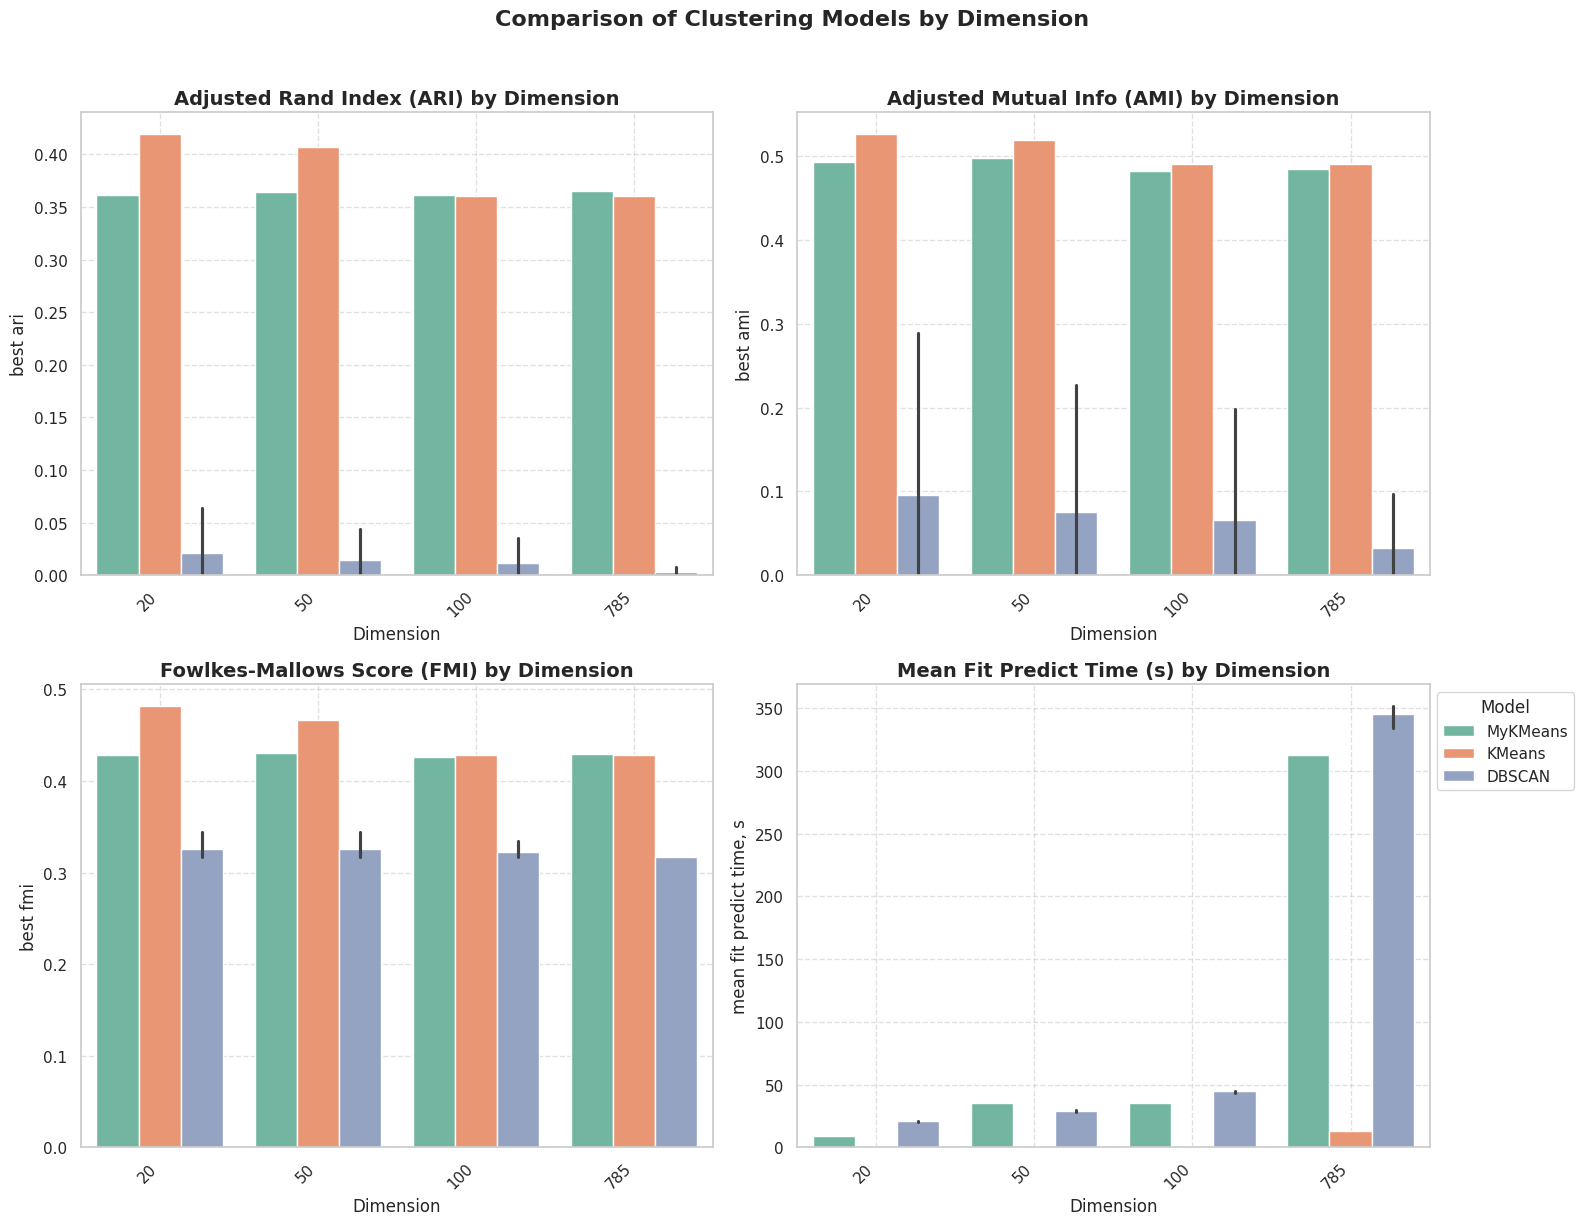

In [ ]:
results = pd.read_csv(pathlib.Path("train_res.csv"))

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 12))

metrics = ["best ari", "best ami", "best fmi", "mean fit predict time, s"]
titles = [
    "Adjusted Rand Index (ARI) by Dimension",
    "Adjusted Mutual Info (AMI) by Dimension",
    "Fowlkes-Mallows Score (FMI) by Dimension",
    "Mean Fit Predict Time (s) by Dimension"
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, (y, title) in enumerate(zip(metrics, titles)):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=results, x="dimension", y=y, hue="cluster", ax=ax, palette="Set2")
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Dimension", fontsize=12)
    ax.set_ylabel(y, fontsize=12)

    if y == "mean fit predict time, s":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Model")
    else:
        ax.get_legend().remove()

    ax.grid(True, linestyle="--", alpha=0.6)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.suptitle("Comparison of Clustering Models by Dimension", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

# Результат
Лучшим получился KMeans, для DBSCAN слишком высокая плотность данных и не до конца подобранные параметры